# Lab 15 Template              

Proving that the SNe data is consistent with the BenchMark Cosmology.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u
from astropy.constants import c

# Importing the solutions from Lab 12-14
from Lab14 import CosmologicalTools

In [2]:

# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc


In [3]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck

In [4]:
BenchMark = CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)
DeSitter = CosmologicalTools(OmegaMD,OmegaRD,OmegaLD,h_planck)



In this exercise we will use data from the Supernova Cosmology project, one of the two teams which first found that the expansion rate of the Universe is accelerating in 1999. A simple introduction to the methods and findings of the SCP group can be found at https://newscenter.lbl.gov/2009/10/27/evolving-dark-energy/. The original paper is Perlmutter *et al.* 1999, "Measurement of $\Omega$ and $\Lambda$ from 42 High Redshift Supernovae", The Astrophysical Journal, Vol. 517, page 565.

The data set we will be using is a more recent sample, containing observations of 580 supernovae, known as the Union 2.1 sample from the paper Suzuki *et al*. 2012, "THE *HUBBLE SPACE TELESCOPE* CLUSTER SUPERNOVA SURVEY. V. IMPROVING THE DARK-ENERGY CONSTRAINTS ABOVE $z>1$ AND BUILDING AN EARLY-TYPE-HOSTED SUPERNOVA SAMPLE", The Astrophysical Journal, vol. 746, page 85.

The data are in the file SNeData.txt.

Take a look at the file using the `with` statement. 

One should always close files when finished using them.
The `with` statement makes this automatic; using it is a good habit to form.

Lets simply open the file and print out the first 10 lines to see how the file is formatted:

In [5]:
with open('SNeData.txt', 'r') as infile:
    for i in range(10):
        line = infile.readline()
        line = line.rstrip("\n")
        print(line)

# Supernova Cosmology Project Union2.1 Data
#  Suzuki et al. 
#Name z DistMod DistModErr ProbLowMassHost
1993ah 0.028488        35.3465833928 0.223905932998  0.128418942246
1993ag 0.050043        36.6823679154 0.166828851413  0.128418942246
1993o  0.052926        36.8176912545 0.1557559148    0.128418942246
1993b  0.070086        37.4467365424 0.158466934433  0.128418942246
1992bs 0.062668        37.4834093505 0.156099434739  0.128418942246
1992br 0.087589        38.2290570494 0.187745679272  0.128418942246
1992bp 0.078577        37.4881622607 0.155635656185  0.128418942246


The top of any good data file intended for sharing with others contains a "header" -- some lines at the top which describe the contents of the file.

Here we see that the file contains the SCP Union2.1 data, and that the columns are:

 * the name of the supernova
 * the redshift measured from its spectrum
 * its distance modulus
 * an estimate of the measurement error in the distance modulus
 * the probability it occurred in a low-mass host galaxy
 
For this exercise, we won't care what a supernova's name is, and we won't get to the last column until the end of the exercise.

# Part A

The difference between the absolute magnitude $M$ and the apparent magnitude $m$, a number called the *distance modulus* which depends only upon the distance to the source

$$
\begin{split}
m-M &= - 2.5 \log_{10} \left(\frac{1}{F_0}\frac{L}{4\pi d^2}\right) + 2.5 \log_{10}\left(\frac{1}{F_0}\frac{L}{4\pi(10\ \textrm{pc})^2}\right)  \\
&= 5 \log_{10}\left(\frac{d_L}{10\ \textrm{pc}}\right)
\end{split}
$$
Because $M$ and $m$ are logarithmic functions, their difference is proportional to the *ratio* of the distance $d$ to 10 pc.

This is the distance measurement given in the data file for the distance to the supernovae. The measured LUMINOSITY distance is then

$$ d_L = 10^{(m-M)/5 +1} \textrm{pc} $$

In [6]:
def Distance_fromMod(mod):
# Distance computed from distance modulus
# input:  mod = m-M (apparent Magnitude - Absolute Magnitude)
# returns Luminosity Distance in Mpc 

## FILL THIS IN 
    return 10**((mod)/5 + 1)*u.pc.to(u.Mpc)

In [7]:
# Read the file in and store the values using `npgenfromtxt`

data = np.genfromtxt('SNeData.txt',names=True,skip_header=2)



In [9]:
data['z'][0]

0.028488

In [10]:
data['DistMod'][0]

35.3465833928

Text(0, 0.5, 'm-M')

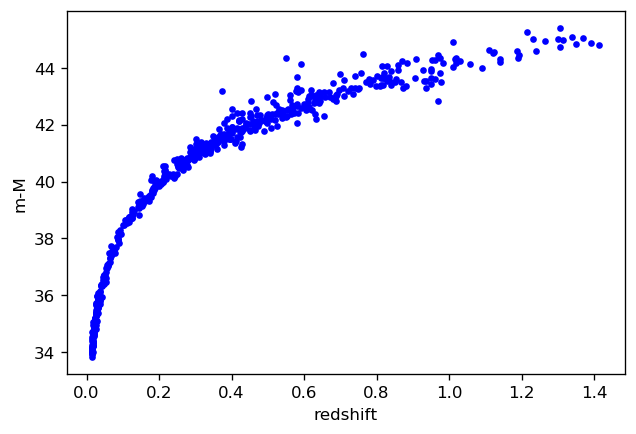

In [11]:
# Create a plot of Distance Modulus Vs. Redshift

plt.rcParams["figure.dpi"] = 120


plt.plot(data['z'],data['DistMod'],'b.')


# plt.plot(## , ## 'b.')
plt.xlabel('redshift')
plt.ylabel('m-M')


# Part B

Now let's form an actual distance in mega-parsecs (Mpc) from the distance modulus and a velocity in km/second from the redshifts

In [15]:
# Use Distance Modulus (from the data) to determine the luminosity distance to each supernova

LD = Distance_fromMod(data['DistMod'])

In [13]:
# Determine the recessional speed based on the redshift
# v = c *z  Relativistic Doppler Shift
# c, speed of light, is currently in m/s need it to be in km/s 

VR = c.to(u.km/u.s)*data['z']

and plot distance versus velocity just for the "nearby" supernovae, those within 200 Mpc of Earth. We can select the set of indices of the nearby supernovae using the `numpy.where` function

In [16]:
# Create an index for the nearby supernovae
near = np.where(LD < 200)

In [18]:
# get the number of nearby supernovae
Nnear = len(near[0])
Nnear

135

Text(0.5, 1.0, '135 nearest supernovae within 200 Mpc')

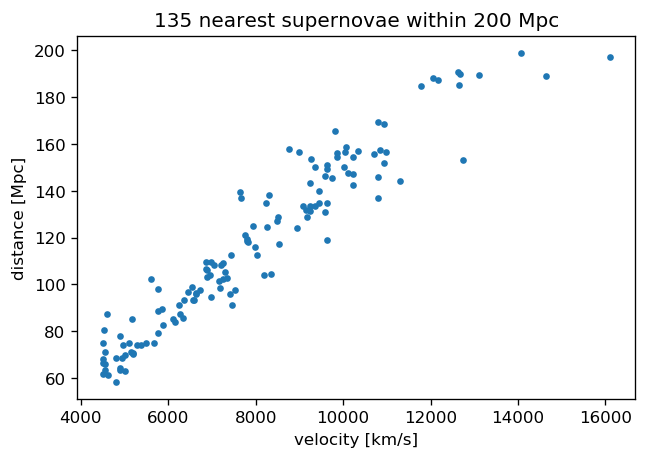

In [19]:
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR[near],LD[near] ,'.')

plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')

# Fill this in :   Add a relevant title
plt.title(f"{Nnear} nearest supernovae within 200 Mpc")

This looks more or less like a linear relationship. If we plot this model atop the data, we see

In [20]:
# Create a linear model
# V = H*R --> R = V/ H 
modelLD = VR/BenchMark.Ho

# 1/Ho ~ Age of the universe 
# this line is equivalently = t_age * VR[near] --> constant expansion over time.



Text(0.5, 1.0, '135 nearest supernovae within 200 Mpc')

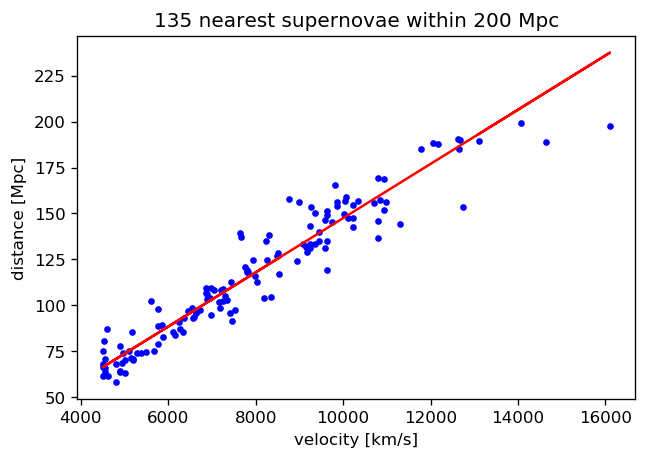

In [21]:
# Recreate the plot, now including the linear model
# FILL THIS IN 


plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR[near],LD[near] ,'b.')
plt.plot(VR[near],modelLD[near],'r')


plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')

# Fill this in :   Add a relevant title
plt.title(f"{Nnear} nearest supernovae within 200 Mpc")


Let's now try plotting the whole dataset, which extends to distances far beyond what Hubble could have measured in his day

Text(0, 0.5, 'distance [Mpc]')

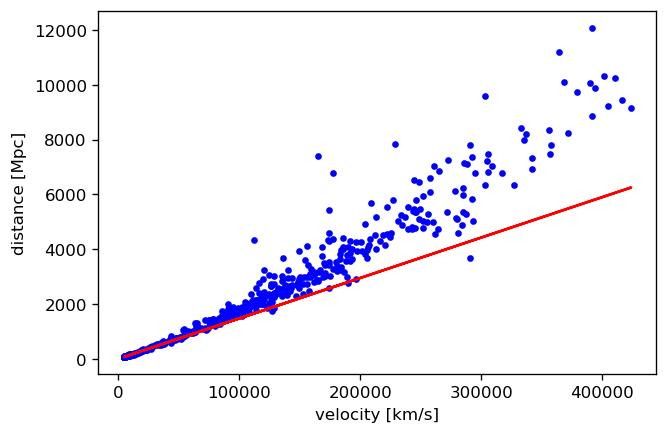

In [22]:
# Plot the whole data set. Not just the nearby Sne. 
# FILL THIS IN 


plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR,LD ,'b.')
plt.plot(VR,modelLD,'r')


plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')

# Fill this in :   Add a relevant title
#plt.title(f"{Nnear} nearest supernovae within 200 Mpc")

The distant supernovae are moving more slowly than a constant Ho would predict...



# Part C


Cosmological Constant: One way of viewing the effect of the GR term proportional to $\Lambda$ is that it represents the mass-energy associated with empty space. Since empty space doesn't emit light, this has come to be known as *Dark Energy*. The notion of empty space, a vacuum, having some energy associated with it is not as crazy as it sounds -- it is a part of the "standard model" of particle physics. The only problem is that the standard model predicts it to be about 120 orders of magnitude greater than what was measured from our data!

The net effect of dark energy is to cause space to expand. Because the amount of dark energy is proportional to the amount of space, as the Universe expands, the amount of dark energy increases, as does its effect causing the expansion to accelerate.


To fix the issue, note that you could import `LambdaCDM` object from `astropy.cosmology` (CDM is "cold dark matter")

`from astropy.cosmology import LambdaCDM`

But instead we're going to use our own code ! 

In [23]:
# modelLD assumed a linear expansion v * t_age of the universe
# but we can use the LuminosityDistance equation to recove the distance to these supernovae in an LCDM model
# In otherwords, the assumption was that the distance is the true physical distance to these Sne, but it isn't.

# Compute the Hubble Parameter as a function of redshift 

# vector of redshifts to compute the luminosity distance
zvec = np.linspace(0.01,1.1*max(data['z']),100)  


In [24]:
## Compute the corresponding recessional velocities
vr_vec = zvec*c.to(u.km/u.s)

In [27]:
## Compute the Luminosity Distance at each redshift  in the BenchMark and Einstein-DeSitter Universes.

modelLD_Bench = [BenchMark.LuminosityDistance(i).value for i in zvec]
modelLD_DeSitter = [DeSitter.LuminosityDistance(i).value for i in zvec]



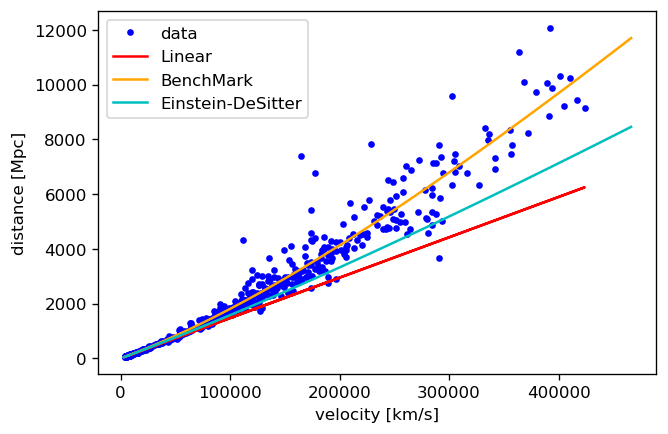

In [30]:
## Plot the New models on top of the data. 
## FILL THIS IN

plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR,LD ,'b.', label='data')
plt.plot(VR, modelLD,'r', label='Linear')
plt.plot(vr_vec, modelLD_Bench, 'orange', label='BenchMark' )
plt.plot(vr_vec, modelLD_DeSitter, 'c', label='Einstein-DeSitter' )

plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')

plt.legend()


# Part D
We can characterize how well the model fits the data by computing the  "$\chi^2$" of the model with respect to the data

$$ \chi = \sqrt{ \frac{\sum_i (\textrm{model}(z_i) - r_i)}{N-1} } $$

Let's write a function to do this:

In [31]:
def chi2(model, data):
    # Function that computes Chi^2
    # Input:  model and data
    deviation = model - data
    sigma2 = np.sum(deviation**2)/(len(data)-1)
    sigma = np.sqrt(sigma2)
    return sigma

The $\chi^2$ of our linear model is then

In [35]:
chi2(modelLD.value, LD)

1148.8827176679633

The $\chi^2$ of our Einstein-DeSitter Luminosity Distance model is then

In [40]:
modelLD2_DeSitter = [DeSitter.LuminosityDistance(i).value for i in data['z']]

chi2(modelLD2_DeSitter, LD)

866.3374284536591

The $\chi^2$ of our BenchMark model is then

In [41]:
modelLD2_BenchMark = [BenchMark.LuminosityDistance(i).value for i in data['z']]

chi2(modelLD2_BenchMark, LD)

506.0734386790636

![title](cosmology.png)

This figure shows the scale of the Universe as a function of time before and after today. There are five cosmological models:

  > Orange line: lots of matter and no dark energy -- the expansion rate is continuously decreasing, and the Universe will end up collapsing
  Green line: a flat universe with only matter -- this is the dividing line between expanding forever and eventually collapsing  
  dashed line: our linear model -- also the GR model for an empty Universe, one with no matter or dark energy.  
  Red line: our "best fit" model -- the expansion rate started off decelerating, but then started accelerating about
  6.4 billion years ago  
  Blue line: more dark energy -- the expansion rate started accelerating about 11.6 billion years ago  

The expansion rate of the Universe in the red region of the diagram has always slowed down with time. In this region, we expect that the distant supernovae, the lower blue dots, would have larger velocities than our linear model would predict
since the expansion rate was higher on average in the earlier Universe.

The expansion rate in the green region starts out decelerating (the curves are concave down), but then start accelerating some time in the past. In this region, we expect that the distant supernovae would have smaller velocities than our linear model would predict since the expansion rate was lower on average in the earlier Universe.



To test this more rigorously we could run through different values of Omega_M and Omega_L and generate probability contours (rather than $\chi^2$)

![title](scp2.1.png)